In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import awkward

In [2]:
colorConvert = {12:'black',11:'black',10:'black',9:'black',8:'black',7:'black',6:'black',5:'g',4:'b',3:'purple',2:'pink',1:'red'}

import matplotlib.patches as mpatches
patch6 = mpatches.Patch(color='black', label='# eLink > 5')
patch5 = mpatches.Patch(color='green', label='# eLink = 5')
patch4 = mpatches.Patch(color='blue', label='# eLink = 4')
patch3 = mpatches.Patch(color='purple', label='# eLink = 3')
patch2 = mpatches.Patch(color='pink', label='# eLink = 2')
patch1 = mpatches.Patch(color='red', label='# eLink = 1')



In [5]:
threshold=1.5
layer = 5

nJobs = 20
thrString = ("%.1f"%threshold).replace('.','p')

fill = 0
again = 0

outputName = 'maxLatency_LinksAboveMin_TTbar_layer%i.pdf'%layer
if fill>0:
    outputName = outputName.replace('.pdf','_filled%i.pdf'%fill)
    if again>0:
        outputName = outputName.replace('.pdf','_againEvery%i.pdf'%again)

        tcCount = []
bitCount = []
latencyTracker = []
OverflowCount = []
ResetCount = []

for i in range(nJobs):
    BufferOutput = "/uscmst1b_scratch/lpc1/3DayLifetime/dnoonan/data/ECON-T_Buffer/Output_Buffer_TTbar200PU_thr%s_layer%i_job%i.pkl"%(thrString,layer,i)
    if fill>0:
        BufferOutput = BufferOutput.replace('_job','_fillEvery%i_job'%fill)
        if again>0:
            BufferOutput = BufferOutput.replace('_job','_againEvery%i_job'%again)
            
            
    with open(BufferOutput,'rb') as f:
#         tcCount.append(pickle.load(f))
#         bitCount.append(pickle.load(f))
#         latencyTracker.append(pickle.load(f))
#         OverflowCount.append(pickle.load(f))
#         ResetCount.append(pickle.load(f))
#         wafers = pickle.load(f)
#         meanBits = pickle.load(f)
        
        tcCount = pickle.load(f)
        bitCount = pickle.load(f)
        latencyTracker.append(pickle.load(f))
        OverflowCount = pickle.load(f)
        ResetCount = pickle.load(f)
        wafers = pickle.load(f)
        meanOcc = pickle.load(f)
        meanBits = pickle.load(f)
    
    
keys = OverflowCount.keys()
N = len(latencyTracker[0][1][0])

keys = np.array(list(keys))

In [4]:
plt.figure()
#for i in range(len(wafers)):
cut = meanBits>0
#(meanBits<150) & (meanBits>100)


WaferList = wafers[cut]
maxLatency = np.array([[latencyTracker[j][k].max() for k in keys] for j in range(nJobs)])
maxLatency = awkward.fromiter(maxLatency.transpose()).max()[cut]
#maxLatency = np.array([latencyTracker[k].max() for k in keys])[:,cut]
#meanBitsCut = meanBits[cut]
#colorSchemeCut = colorScheme[cut]

plt.figure()
colorBin = np.digitize(meanBits,bins=np.linspace(0,256,9))
colorScheme = np.array([colorConvert[x] for x in colorBin])
for i, Wafer in enumerate(WaferList):
    Wafer  = wafers[i]
    
    y = maxLatency[i]
    x = keys - np.round(meanBits[i]/32 + .5)
#    x = keys - (meanBitsCut[i]/32)
#    x = (keys*32 - meanBitsCut[i])/(meanBitsCut[i])*100 
    y[y>20]=20
    plt.scatter(x,y,c=colorScheme[i])
plt.xlabel('# of links above Minimum Need')
#plt.xlabel('Percent above Average')
plt.ylabel('Max latency')
plt.axis([-2,5,-1,22])

plt.legend(handles=[patch6,patch5,patch4,patch3,patch2,patch1])
plt.savefig(outputName,format='pdf')



plt.figure()
colorBin = np.digitize(1.3*meanBits,bins=np.linspace(0,256,9))
colorScheme = np.array([colorConvert[x] for x in colorBin])
for i, Wafer in enumerate(WaferList):
    Wafer  = wafers[i]
    
    y = maxLatency[i]
    x = keys - np.round(1.3*meanBits[i]/32 + .5)
    y[y>20]=20
    plt.scatter(x,y,c=colorScheme[i])
plt.xlabel('# of links above Nominal (Minimum Data Plus 30%)')
plt.ylabel('Max latency')
plt.axis([-2,5,-1,22])

plt.legend(handles=[patch6,patch5,patch4,patch3,patch2,patch1])
plt.savefig(outputName.replace('LinksAboveMin','LinksAboveMinPlus30'),format='pdf')

plt.figure()
colorBin = np.digitize(meanBits,bins=np.linspace(0,256,9))
colorScheme = np.array([colorConvert[x] for x in colorBin])
for i, Wafer in enumerate(WaferList):
    Wafer  = wafers[i]
    
    y = maxLatency[i]
    x = keys - meanBits[i]/32
    y[y>20]=20
    plt.scatter(x,y,c=colorScheme[i])
plt.xlabel('# of links above Average')
plt.ylabel('Max latency')
plt.axis([-2,5,-1,22])

plt.legend(handles=[patch6,patch5,patch4,patch3,patch2,patch1])
plt.savefig(outputName.replace('LinksAboveMin','LinksAboveAverage'),format='pdf')




plt.figure()
colorBin = np.digitize(meanBits,bins=np.linspace(0,256,9))
colorScheme = np.array([colorConvert[x] for x in colorBin])
for i, Wafer in enumerate(WaferList):
    Wafer  = wafers[i]
    y = maxLatency[i]
    x = (keys*32 - meanBits[i])/(meanBits[i])*100 
    y[y>20]=20
    plt.scatter(x,y,c=colorScheme[i])
plt.xlabel('Percent above Average')
plt.ylabel('Max latency')
plt.axis([-20,150,0,22])
plt.plot([30,30],[0,20]);

plt.legend(handles=[patch6,patch5,patch4,patch3,patch2,patch1])

plt.savefig(outputName.replace('LinksAboveMin','PercentAboveAverage'),format='pdf')

NameError: name 'meanBits' is not defined

<Figure size 432x288 with 0 Axes>

In [41]:
colorBin

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

4 1 [9] 0.8560053819444444 0.49170555555555556
5 2 [9] 0.8489998263888889 0.4744611111111111


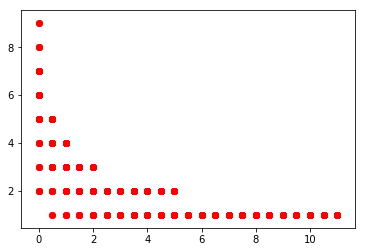

In [40]:
colorBin = np.digitize(meanBits,bins=np.linspace(0,256,9))
colorScheme = np.array([colorConvert[x] for x in colorBin])
for i, Wafer in enumerate(WaferList):
    Wafer  = wafers[i]
    
    y = maxLatency[i]
    x = keys - np.round(meanBits[i]/32 + .5)
    y[y>20]=20
    plt.scatter(x,y,c=colorScheme[i])
    if colorBin[i]==1:
        if y[x==0]==9:
            print (Wafer,i,y[x==0],meanBits[i]/32,meanOcc[i])

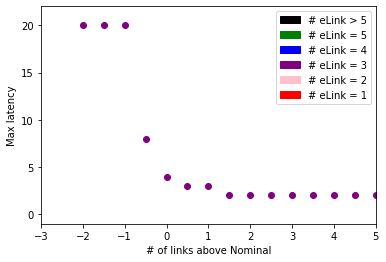

In [16]:
cut = meanBits>0
#(meanBits<150) & (meanBits>100)


WaferList = wafers[cut]
maxLatency = np.array([[latencyTracker[j][k].max() for k in keys] for j in range(nJobs)])
maxLatency = awkward.fromiter(maxLatency.transpose()).max()[cut]

plt.figure()
colorBin = np.digitize(meanBits,bins=np.linspace(0,256,9))
colorScheme = np.array([colorConvert[x] for x in colorBin])
for i, Wafer in enumerate(WaferList):
    if not i==22: continue
    Wafer  = wafers[i]
    
    y = maxLatency[i]
    x = keys - np.round(1.3*meanBits[i]/32 + .5)
    y[y>20]=20
    plt.scatter(x,y,c=colorScheme[i])
plt.xlabel('# of links above Nominal')
plt.ylabel('Max latency')
plt.axis([-3,5,-1,22])

plt.legend(handles=[patch6,patch5,patch4,patch3,patch2,patch1])
plt.savefig("ExampleMaxOccup.pdf",format='pdf')

In [18]:
meanOcc[22]

3.5925555555555557

In [20]:
meanBits[22]

67.70322222222222

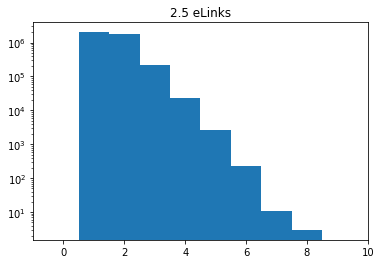

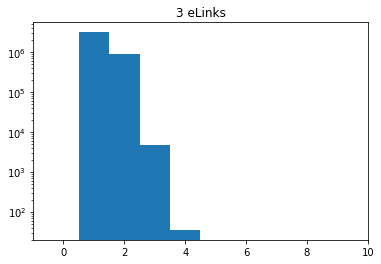

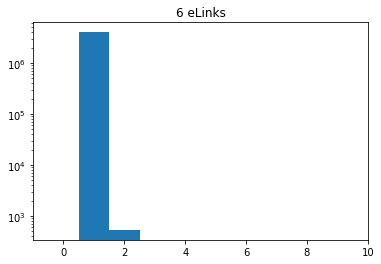

In [38]:
plt.figure()
plt.hist(np.array([latencyTracker[i][2.5][22] for i in range(nJobs)]).flatten(),bins=np.linspace(-0.5,9.5,11));
plt.yscale('log')
plt.title('2.5 eLinks')
plt.savefig("ExampleOccup_2p5.pdf",format='pdf')


plt.figure()
plt.hist(np.array([latencyTracker[i][3][22] for i in range(nJobs)]).flatten(),bins=np.linspace(-0.5,9.5,11));
plt.yscale('log')
plt.title('3 eLinks')
plt.savefig("ExampleOccup_3.pdf",format='pdf')

plt.figure()
plt.hist(np.array([latencyTracker[i][6][22] for i in range(nJobs)]).flatten(),bins=np.linspace(-0.5,9.5,11));
plt.yscale('log')
plt.title('6 eLinks')
plt.savefig("ExampleOccup_6.pdf",format='pdf')

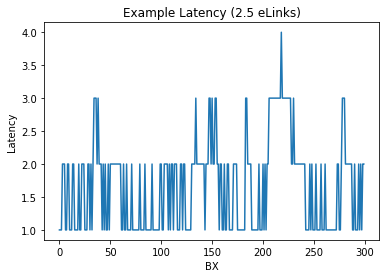

In [49]:
plt.plot(range(300),latencyTracker[0][2.5][22][:300])
plt.xlabel('BX')
plt.ylabel('Latency')
plt.title('Example Latency (2.5 eLinks)')
plt.savefig("ExampleLatency.pdf",format='pdf')